In [6]:
import sys
import os

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from back_test import Backtest
from diffusion import GBM
from option import OptionType, EuropeanOption
from position import OptionsPosition
from pricing_engine import BlackScholesPricingEngine
from strategy import DeltaHedgingStrategy

%matplotlib inline

In [7]:
# define the option and corresponding position 
option = EuropeanOption(strike=50, expiry=1.5, option_type=OptionType.Call)
position = OptionsPosition(instrument=option, notional=-1_000_000)

# define the hedging strategy we want to do
delta_strategy = DeltaHedgingStrategy(position=position)

# define the diffusion process that governs the data generating process 
gbm = GBM(s0=50, mu=0.15, sigma=0.1, seed=115)

# define the pricing engine: 
pricing_engine = BlackScholesPricingEngine(r=0.1, sigma=gbm.sigma)

In [8]:
# define and run the backtest
backtest = Backtest(strategy=delta_strategy, diffusion_process=gbm, pricing_engine=pricing_engine)
results  = backtest.simulate_strategy(T=1.5, position=position)

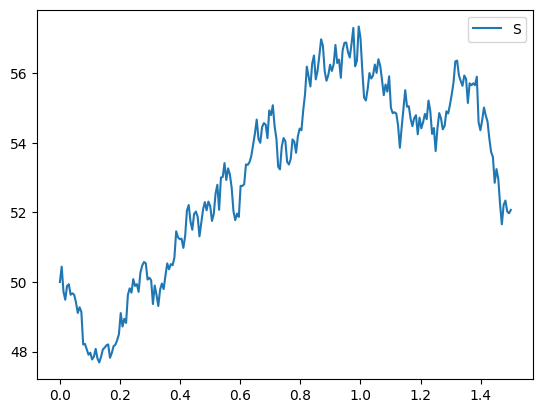

In [21]:
t = results['times']

# plt.plot(t, results['portfolio_value'], label="Portfolio PnL")
plt.plot(t, results['S'], label='S')
plt.legend()